IMPORT LIBRARIES

In [6]:
# Basic Operation
import pandas as pd
import numpy as np

# Text Preprocessing & Cleaning
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import re


from sklearn.model_selection import train_test_split # Split Data 
from imblearn.over_sampling import SMOTE # Handling Imbalanced

# Model Building
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.svm import SVC


from sklearn.metrics import classification_report , confusion_matrix , accuracy_score # Performance Metrics  


# Data Visualization 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from termcolor import cprint
import seaborn as sns
import warnings   


warnings.filterwarnings('ignore')
%matplotlib inline


In [7]:
import os
for dirname, _, filenames in os.walk('/content/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Streaming output truncated to the last 5000 lines.
/content/drive/MyDrive/Wheat-Disease-Detection-Data/Train/Wheat Loose Smut/8931.jpg
/content/drive/MyDrive/Wheat-Disease-Detection-Data/Train/Wheat Loose Smut/5901.jpg
/content/drive/MyDrive/Wheat-Disease-Detection-Data/Train/Wheat Loose Smut/2801.jpg
/content/drive/MyDrive/Wheat-Disease-Detection-Data/Train/Wheat Loose Smut/5911.jpg
/content/drive/MyDrive/Wheat-Disease-Detection-Data/Train/Wheat Loose Smut/8941.jpg
/content/drive/MyDrive/Wheat-Disease-Detection-Data/Train/Wheat Loose Smut/3241.jpg
/content/drive/MyDrive/Wheat-Disease-Detection-Data/Train/Wheat Loose Smut/0161.jpg
/content/drive/MyDrive/Wheat-Disease-Detection-Data/Train/Wheat Loose Smut/6321.jpg
/content/drive/MyDrive/Wheat-Disease-Detection-Data/Train/Wheat Loose Smut/Wheat-Smut-Loose-smut-1-Craig-Grau-and-University-of-Wisconsin-Teaching-Images.jpg
/content/drive/MyDrive/Wheat-Disease-Detection-Data/Train/Wheat Loose Smut/loose-smut-of-wheat-wheat-1582814389.jpg
/co

Load The Data

In [8]:
df=pd.read_csv('/content/drive/MyDrive/Tweets.csv')

Now Check the Head and Tail of the dataset

In [9]:
df.head()

tweet_id  ...               user_timezone
0  570306133677760513  ...  Eastern Time (US & Canada)
1  570301130888122368  ...  Pacific Time (US & Canada)
2  570301083672813571  ...  Central Time (US & Canada)
3  570301031407624196  ...  Pacific Time (US & Canada)
4  570300817074462722  ...  Pacific Time (US & Canada)

[5 rows x 15 columns]

In [10]:
df.tail()

tweet_id  ...               user_timezone
14635  569587686496825344  ...                         NaN
14636  569587371693355008  ...                         NaN
14637  569587242672398336  ...                         NaN
14638  569587188687634433  ...  Eastern Time (US & Canada)
14639  569587140490866689  ...                         NaN

[5 rows x 15 columns]

EDA Part

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [12]:
df.describe()

tweet_id  ...  retweet_count
count  1.464000e+04  ...   14640.000000
mean   5.692184e+17  ...       0.082650
std    7.791112e+14  ...       0.745778
min    5.675883e+17  ...       0.000000
25%    5.685592e+17  ...       0.000000
50%    5.694779e+17  ...       0.000000
75%    5.698905e+17  ...       0.000000
max    5.703106e+17  ...      44.000000

[8 rows x 4 columns]

In [13]:
df.shape

(14640, 15)

Now Check Nan value in our dataset

In [14]:
df.isnull().sum()


tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

DATA VISUALIZATION

Total number of sentiments of tweets :
negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64


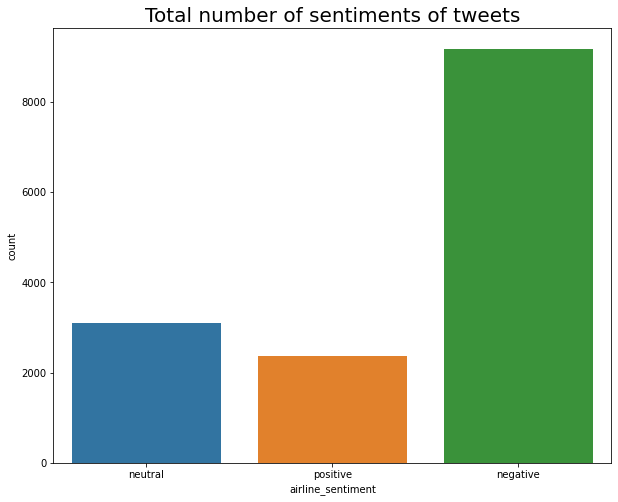

In [15]:
cprint("Total number of sentiments of tweets :",'green')
print(df.airline_sentiment.value_counts())
plt.figure(figsize = (10, 8))
ax = sns.countplot(x = 'airline_sentiment', data = df)
ax.set_title(label = 'Total number of sentiments of tweets', fontsize = 20)
plt.show()

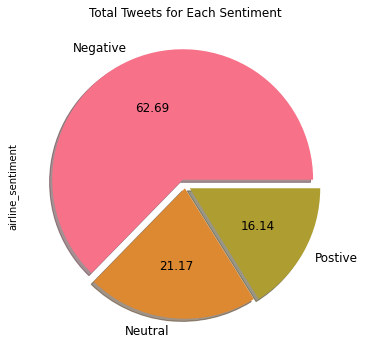

In [16]:
ax.set_title(label = 'Total number of sentiments of tweets:')
colors=sns.color_palette('husl',10)
pd.Series(df['airline_sentiment']).value_counts().plot(kind='pie',colors=colors,labels=['Negative','Neutral','Postive'],explode=[0.05,0.02,0.04],shadow=True,autopct='%.2f',fontsize=12,figsize=(6,6),title="Total Tweets for Each Sentiment")

plt.show()

Text(0, 0.5, 'No.of Tweets')

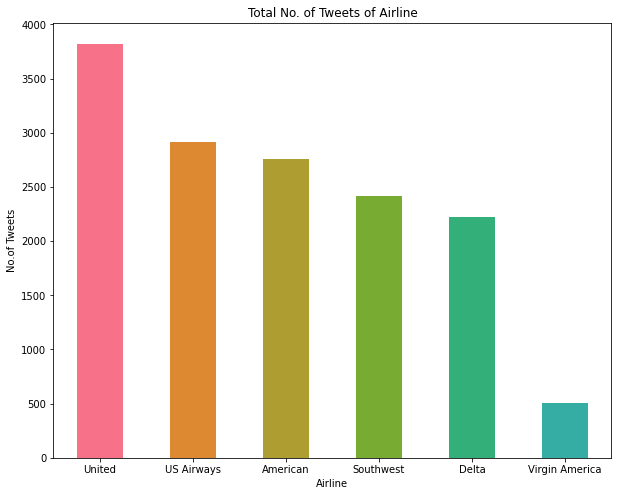

In [17]:
colors=sns.color_palette('husl',10)
pd.Series(df['airline']).value_counts().plot(kind="bar",color=colors,figsize=(10,8),fontsize=10,rot=0,title='Total No. of Tweets of Airline')
plt.xlabel('Airline',fontsize=10)
plt.ylabel('No.of Tweets',fontsize=10)

Total number of tweets for each airline :
airline
American          2759
Delta             2222
Southwest         2420
US Airways        2913
United            3822
Virgin America     504
Name: airline_sentiment, dtype: int64


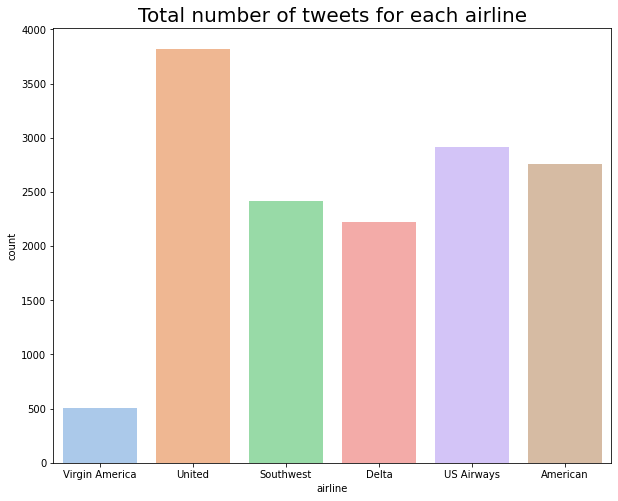

Total number of sentiment tweets for each airline :
US Airways : 
 negative    2263
neutral      381
positive     269
Name: airline_sentiment, dtype: int64
United : 
 negative    2633
neutral      697
positive     492
Name: airline_sentiment, dtype: int64
American : 
 negative    1960
neutral      463
positive     336
Name: airline_sentiment, dtype: int64
Southwest : 
 negative    1186
neutral      664
positive     570
Name: airline_sentiment, dtype: int64
Delta : 
 negative    955
neutral     723
positive    544
Name: airline_sentiment, dtype: int64
Virgin America : 
 negative    181
neutral     171
positive    152
Name: airline_sentiment, dtype: int64


In [18]:
cprint("Total number of tweets for each airline :",'green')
print(df.groupby('airline')['airline_sentiment'].count())

plt.figure(figsize = (10, 8))
ax = sns.countplot(x = 'airline', data = df, palette = 'pastel')
ax.set_title(label = 'Total number of tweets for each airline', fontsize = 20)
plt.show()

cprint("Total number of sentiment tweets for each airline :",'green')
airlines= ['US Airways','United','American','Southwest','Delta','Virgin America']
for i in airlines :
    print('{} : \n'.format(i),df.loc[df.airline == i].airline_sentiment.value_counts())

Now Reasons Of Negative Tweets

Reasons Of Negative Tweets :
Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64


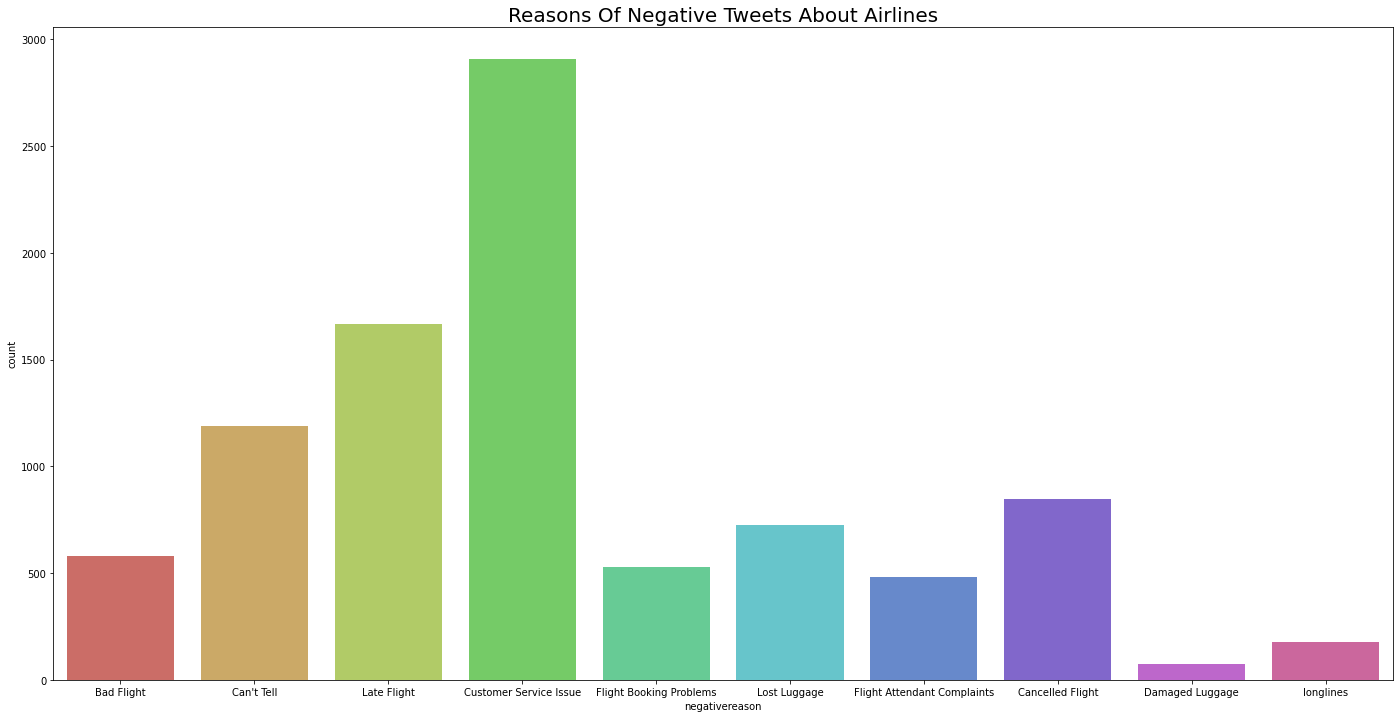

In [19]:
cprint('Reasons Of Negative Tweets :','green')
print(df.negativereason.value_counts())

plt.figure(figsize = (24, 12))
sns.countplot(x = 'negativereason', data = df, palette = 'hls')
plt.title('Reasons Of Negative Tweets About Airlines', fontsize = 20)
plt.show()

Now Reasons Of Negative Tweets on Every AirLine Company

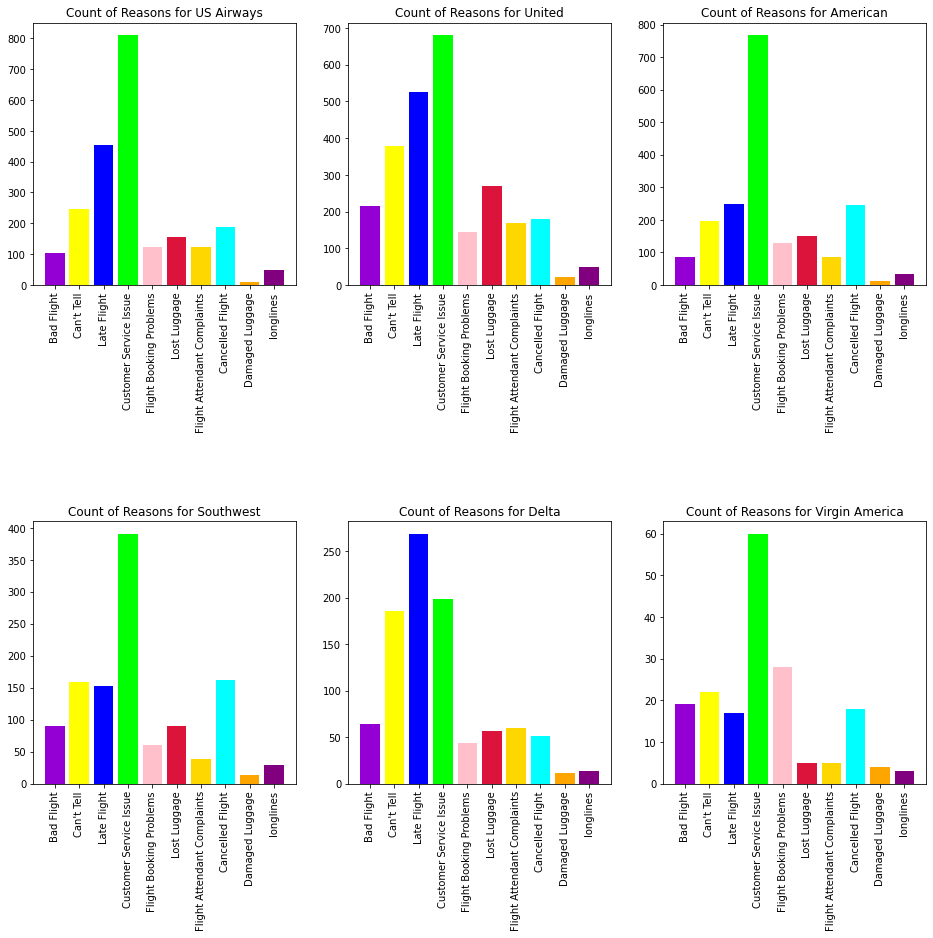

In [20]:
NR_Count=df['negativereason'].value_counts()
def NCount(Airline):
    airlineName =df[df['airline']==Airline]
    count= airlineName['negativereason'].value_counts()
    Unique_reason= df['negativereason'].unique()
    Unique_reason=[x for x in Unique_reason if str(x) != 'nan']
    Reason_frame=pd.DataFrame({'Reasons':Unique_reason})
    Reason_frame['count']=Reason_frame['Reasons'].apply(lambda x: count[x])
    return Reason_frame

def Plot_Reason(airline):
    a= NCount(airline)
    count=a['count']
    Id = range(1,(len(a)+1))
    plt.bar(Id,count, color=['darkviolet','yellow','blue','lime','pink','crimson','gold','cyan','orange','purple'])
    plt.xticks(Id,a['Reasons'],rotation=90)
    plt.title('Count of Reasons for '+ airline)
    
plt.figure(2,figsize=(16, 14))
for i in airlines:
    indices= airlines.index(i)
    plt.subplot(2,3,indices+1)
    plt.subplots_adjust(hspace=0.9)
    Plot_Reason(i)

Split Text Of Sentiments

In [21]:
positive=df[df['airline_sentiment']=='positive'].text
neutral=df[df['airline_sentiment']=='neutral'].text
negative=df[df['airline_sentiment']=='negative'].text

Now World Cloud of Postive Sentiments

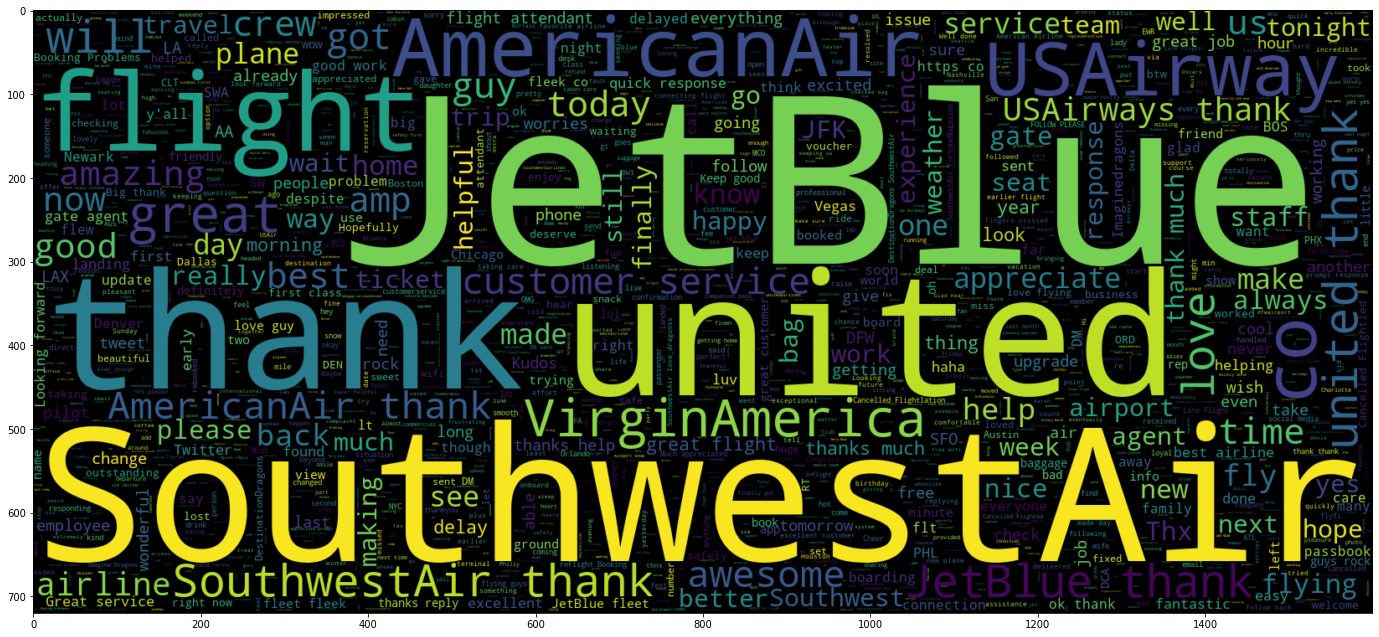

In [22]:
plt.figure(figsize=(24,20))
world_cloud_postive=WordCloud(min_font_size=3,max_words=3200,width=1600,height=720).generate("".join(positive))
plt.imshow(world_cloud_postive,interpolation='bilinear')
ax.grid(False)

World could of Neutral sentiments

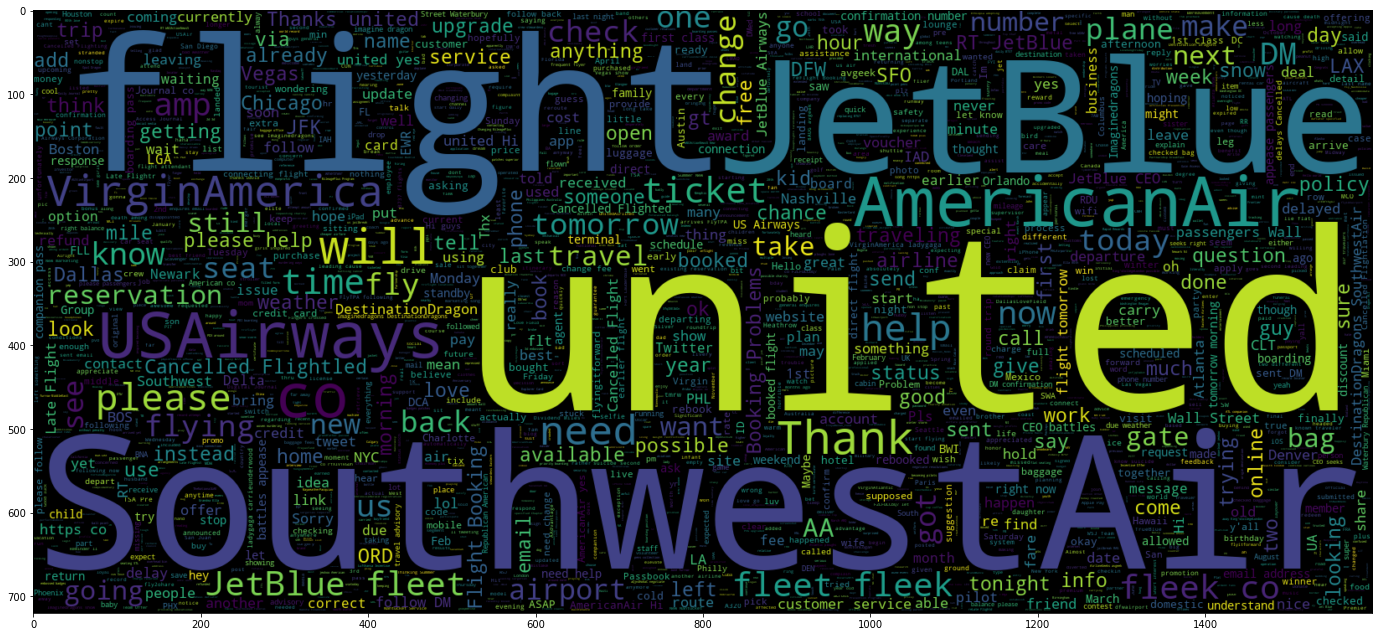

In [23]:
plt.figure(figsize=(24,12))
world_cloud_neutral=WordCloud(min_font_size=3,max_words=3200,width=1600,height=720).generate(" ".join(neutral))
plt.imshow(world_cloud_neutral,interpolation='bilinear')
ax.grid(False)

World could of Negative sentiments

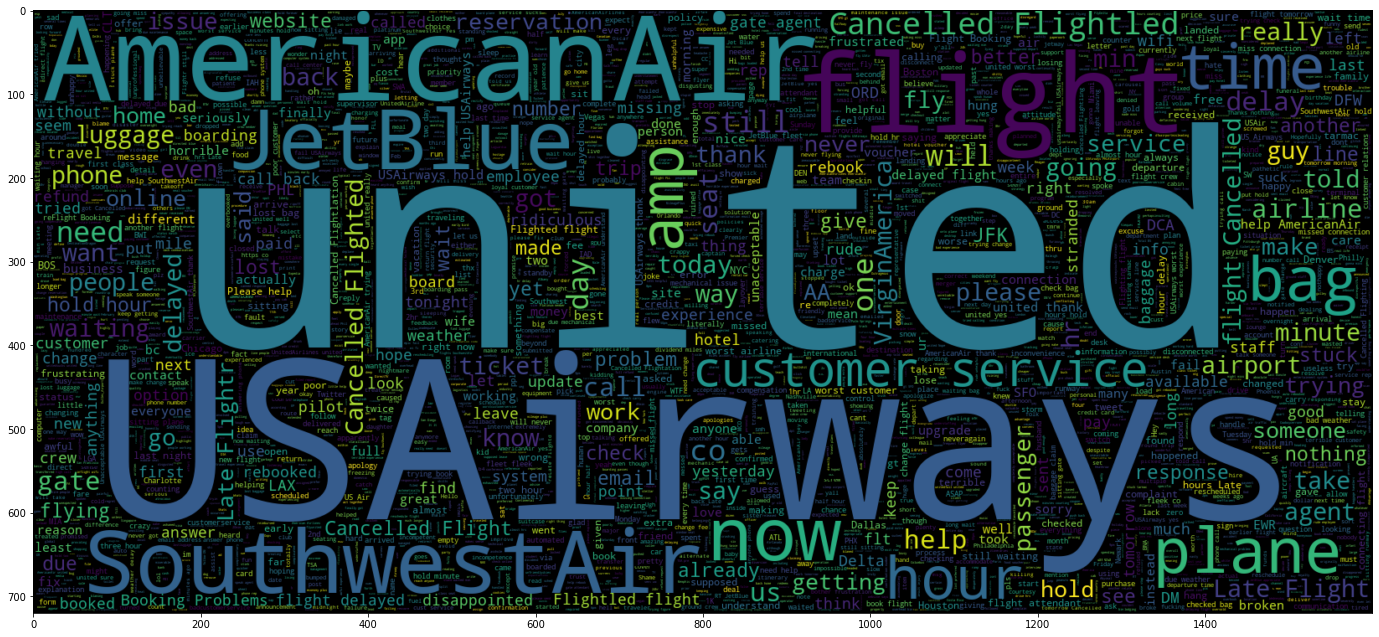

In [24]:
plt.figure(figsize = (24,12)) 
worldcould_neg = WordCloud(min_font_size = 3,  max_words = 3200 , width = 1600 , height = 720).generate(" ".join(negative))
plt.imshow(worldcould_neg,interpolation = 'bilinear')
ax.grid(False)

TEXT PREPROCESSING AND CLEANING

In [25]:
# convert Sentiments to 0,1,2
def convert_Sentiment(sentiment):
    if  sentiment == "positive":
        return 2
    elif sentiment == "neutral":
        return 1
    elif sentiment == "negative":
        return 0

In [26]:
# Apply convert_Sentiment function
df.airline_sentiment = df.airline_sentiment.apply(lambda x : convert_Sentiment(x))

In [27]:
df.airline_sentiment

0        1
1        2
2        1
3        0
4        0
        ..
14635    2
14636    0
14637    1
14638    0
14639    1
Name: airline_sentiment, Length: 14640, dtype: int64

In [28]:
# Remove stop words
import nltk
from collections import Counter
nltk.download("stopwords")


def remove_stopwords(text):
  stop_words = stopwords.words('english')
  stopwords_dict = Counter(stop_words)
  text = ' '.join([word for word in text.split() if word not in stopwords_dict])
  #text = ' '.join([word for word in text.split() if word not in (stopwords.words("english"))])
  return text

# Remove url  
def remove_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

# Remove punct
def remove_punct(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)

# Remove html 
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

# Remove @username
def remove_username(text):
    return re.sub('@[^\s]+','',text)

# Remove emojis
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)


# Decontraction text
def decontraction(text):
    text = re.sub(r"won\'t", " will not", text)
    text = re.sub(r"won\'t've", " will not have", text)
    text = re.sub(r"can\'t", " can not", text)
    text = re.sub(r"don\'t", " do not", text)
    
    text = re.sub(r"can\'t've", " can not have", text)
    text = re.sub(r"ma\'am", " madam", text)
    text = re.sub(r"let\'s", " let us", text)
    text = re.sub(r"ain\'t", " am not", text)
    text = re.sub(r"shan\'t", " shall not", text)
    text = re.sub(r"sha\n't", " shall not", text)
    text = re.sub(r"o\'clock", " of the clock", text)
    text = re.sub(r"y\'all", " you all", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"n\'t've", " not have", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'d've", " would have", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ll've", " will have", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"\'re", " are", text)
    return text  

# Seperate alphanumeric
def seperate_alphanumeric(text):
    words = text
    words = re.findall(r"[^\W\d_]+|\d+", words)
    return " ".join(words)

def cont_rep_char(text):
    tchr = text.group(0) 
    
    if len(tchr) > 1:
        return tchr[0:2] 

def unique_char(rep, text):
    substitute = re.sub(r'(\w)\1+', rep, text)
    return substitute

def char(text):
    substitute = re.sub(r'[^a-zA-Z]',' ',text)
    return substitute

# combaine negative reason with  tweet (if exsist)
df['final_text'] = df['negativereason'].fillna('') + ' ' + df['text'] 


# Apply functions on tweets
df['final_text'] = df['final_text'].apply(lambda x : remove_username(x))
df['final_text'] = df['final_text'].apply(lambda x : remove_url(x))
df['final_text'] = df['final_text'].apply(lambda x : remove_emoji(x))
df['final_text'] = df['final_text'].apply(lambda x : decontraction(x))
df['final_text'] = df['final_text'].apply(lambda x : seperate_alphanumeric(x))
df['final_text'] = df['final_text'].apply(lambda x : unique_char(cont_rep_char,x))
df['final_text'] = df['final_text'].apply(lambda x : char(x))
df['final_text'] = df['final_text'].apply(lambda x : x.lower())
df['final_text'] = df['final_text'].apply(lambda x : remove_stopwords(x))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [29]:
# result
df['final_text']

0                                                     said
1                  plus added commercials experience tacky
2                   today must mean need take another trip
3        bad flight really aggressive blast obnoxious e...
4                             ca tell really big bad thing
                               ...                        
14635                   thank got different flight chicago
14636    customer service issue leaving minutes late fl...
14637            please bring american airlines blackberry
14638    customer service issue money change flight ans...
14639    ppl need know many seats next flight plz put u...
Name: final_text, Length: 14640, dtype: object

In [30]:
X = df['final_text']
y = df['airline_sentiment']

Now Apply TFIDF on cleaned tweets

In [31]:
tfid = TfidfVectorizer()
X_final =  tfid.fit_transform(X)

HANDLING IMBALANCE

In [32]:
# Handling imbalanced using SMOTE
smote = SMOTE()
x_sm,y_sm = smote.fit_resample(X_final,y)

# Split Data into train & test

In [33]:
X_train , X_test , y_train , y_test = train_test_split(x_sm , y_sm , test_size=0.25,random_state=3)

Now Random Forest

In [54]:
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train,y_train)

RandomForestClassifier()

In [55]:
random_forest_classifier_prediction =  random_forest_classifier.predict(X_test)

Now Randome Forest Accuracy Score

In [57]:
accuracy_score(random_forest_classifier_prediction,y_test)

0.954822777454968

Now XGBClassifier

In [58]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(objective='multi:softprob')

In [59]:
xgb_prediction =  xgb.predict(X_test)

Now XGBClassifier Accuracy Score

In [60]:
accuracy_score(xgb_prediction,y_test)

0.8692620569436375

Gradient Boosting Classifier

In [61]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)


GradientBoostingClassifier()

In [62]:
gbc_prediction =  gbc.predict(X_test)

Now Gradient Boosting Classifier Accuracy Score

In [63]:
accuracy_score(gbc_prediction,y_test)

0.8808832074375363

Support vector machine

In [64]:
svm = SVC()
svm.fit(X_train,y_train)

SVC()

In [65]:
svm_prediction =  svm.predict(X_test)

Now Support vector machine Accuracy Score

In [66]:
accuracy_score(svm_prediction,y_test)

0.9378268448576409

Naive Bayes

In [67]:
nb = MultinomialNB()
nb.fit(X_train,y_train)

MultinomialNB()

In [68]:
nb_prediction =  nb.predict(X_test)

Naive Bayes Accuracy Score

In [69]:
accuracy_score(nb_prediction,y_test)

0.8663567693201627

Decision Tree

In [70]:
des_tree_classifier = DecisionTreeClassifier()
des_tree_classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [71]:
des_tree_classifier_prediction=des_tree_classifier.predict(X_test)

Decision Tree Classifier Accuracy Score

In [72]:
accuracy_score(des_tree_classifier_prediction,y_test)

0.9436374201045904

VISUALIZE MODEL PERFORMENCE

In [73]:
cr = classification_report(y_test, random_forest_classifier_prediction)

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      2343
           1       0.94      0.93      0.94      2264
           2       0.95      0.93      0.94      2277

    accuracy                           0.95      6884
   macro avg       0.95      0.95      0.95      6884
weighted avg       0.95      0.95      0.95      6884



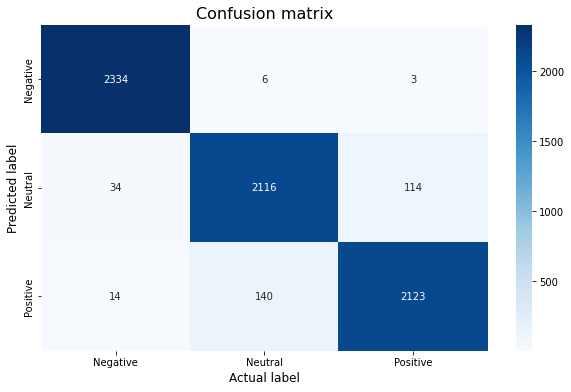

In [74]:
print("Classification Report:\n----------------------\n", cr)

cm = confusion_matrix(y_test,random_forest_classifier_prediction)


# plot confusion matrix 
plt.figure(figsize=(10,6))
sentiment_classes = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
            xticklabels=sentiment_classes,
            yticklabels=sentiment_classes)
plt.title('Confusion matrix', fontsize=16)
plt.xlabel('Actual label', fontsize=12)
plt.ylabel('Predicted label', fontsize=12)
plt.show()